# Introduction - Flight data 2004

In the contemporary world, air travel has become an integral part of global connectivity, facilitating the movement of millions of passengers and vast amounts of cargo across international borders daily. The aviation industry, with its complex network of routes and schedules, generates a substantial amount of data that is crucial for various stakeholders, including airlines, airports, regulators, and researchers.

The dataset was details of flights arriving or departing in the USA on the major carriers in 2004 and is the dataset for the 2009 ASA Statistical Computing and Graphics Data Expo. It's a really big dataset: just under 120 million records.

The general objective of the data expo is to give a graphic overview of an important feature of the data set. This analysis will tackle these question:

1. What are the optimal times of day, days of the week, and times of the year for minimizing flight delays?
2. What are the primary factors contributing to flight delays?
3. What factors predominantly lead to flight cancellations?
4. Which flight experiences the most frequent and significant delays and cancellations?

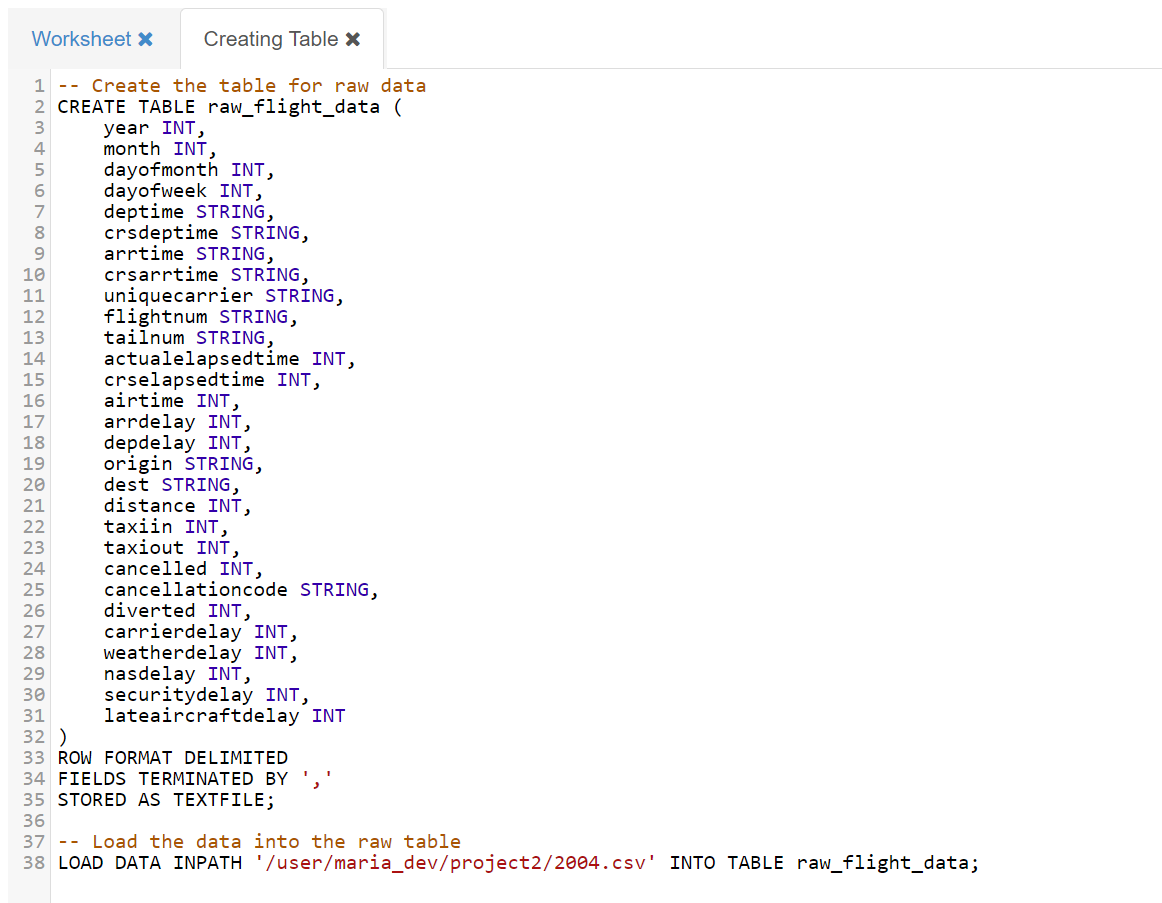

In [4]:
from IPython.display import Image
Image('SS/create_table.png', width =1000)

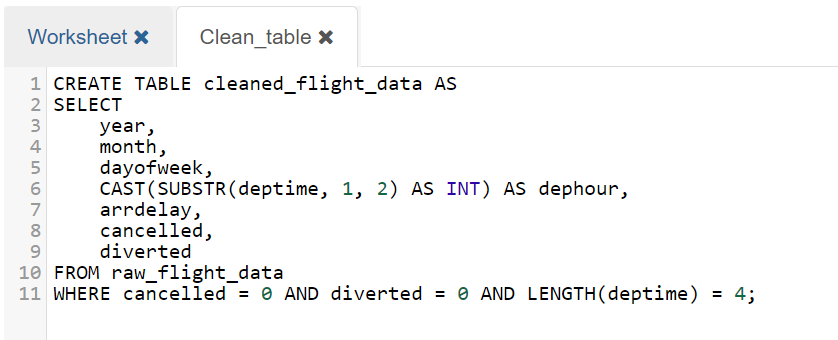

In [10]:
Image('SS/clean_table.png', width =700)

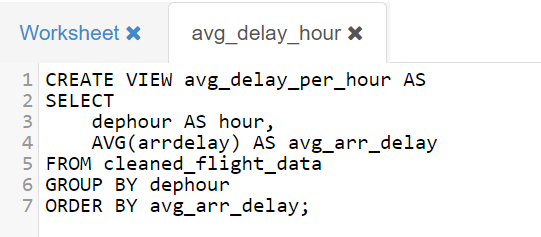

In [9]:
Image('SS/delay_hour.png', width =500)

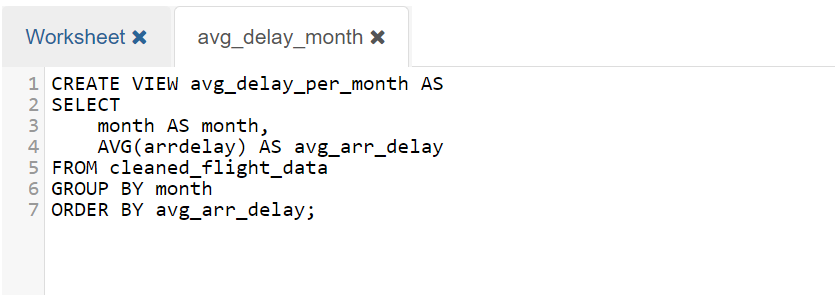

In [13]:
Image('SS/delay_month.png', width =700)

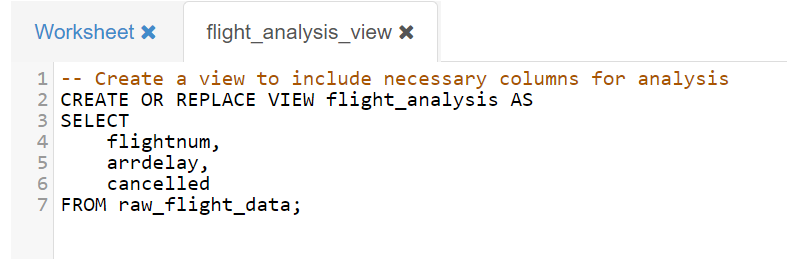

In [16]:
Image('SS/flight_analysis.png', width =700)

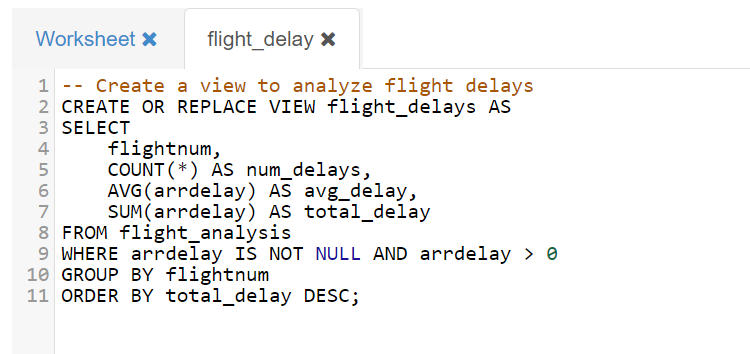

In [15]:
Image('SS/flight_delay.png', width =700)

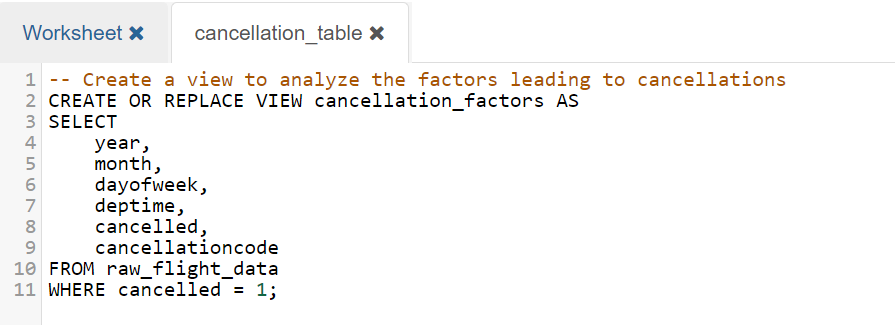

In [18]:
Image('SS/cancel_table.png', width =700)

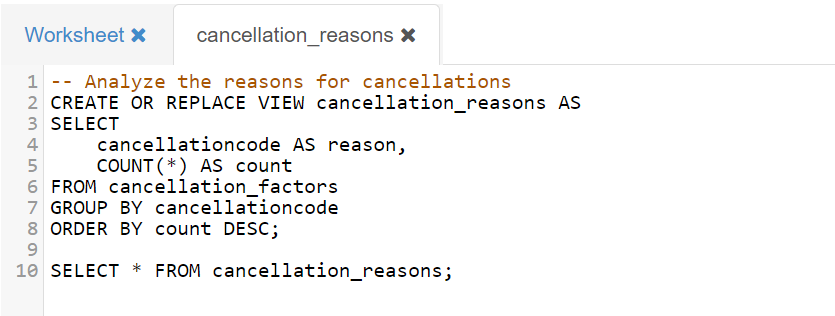

In [19]:
Image('SS/cancel_reasons.png', width =700)

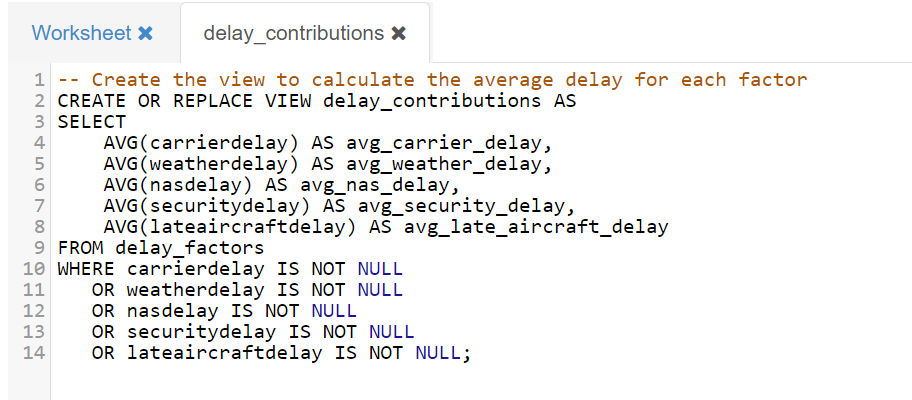

In [20]:
Image('SS/delay_contribute.png', width =700)

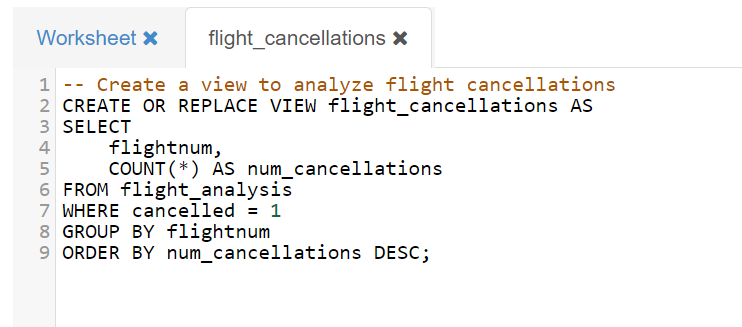

In [22]:
Image('SS/flight_cancel.png', width =700)

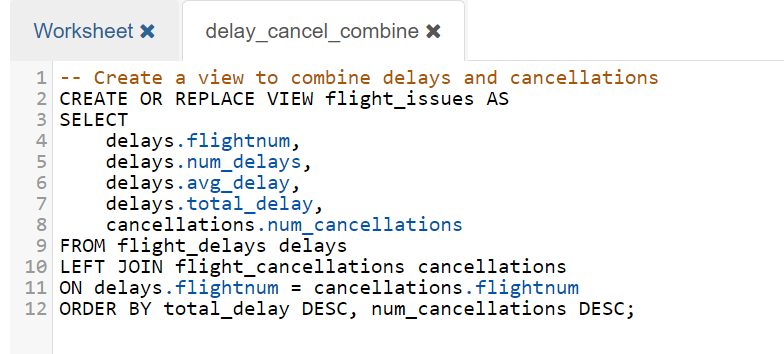

In [21]:
Image('SS/delay_cancel_combine.png', width =700)

In [24]:
# Load all necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Retrieve current working directory
import os
print(os.getcwd())

C:\Users\Radzmi\Documents\UKM Master\Data management\Assignment\Assignment_2


In [26]:
# Define the list of CSV files to be combined
csv_files = [
    'avg_delay_hour.csv',
    'avg_delay_month.csv',
    'avg_delay_week.csv',
    'cancellation_factor.csv',
    'delay_factor.csv',
    'worst_flight.csv'
]

# Initialize an empty list to hold dataframes
dfs = []

# Loop through each CSV file name and read the file into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes in the list into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv('flight_combine.csv', index=False)

print("CSV files have been successfully combined into 'flight_combine.csv'")

CSV files have been successfully combined into 'flight_combine.csv'


In [27]:
# Load the csv file
flight = pd.read_csv('flight_combine.csv')

In [28]:
# View all columns available and first few rows of the dataset
flight.head()

,avg_delay_per_hour.hour,avg_delay_per_hour.avg_arr_delay,avg_delay_per_month.month,avg_delay_per_month.avg_arr_delay,avg_delay_per_day_of_week.day_of_week,avg_delay_per_day_of_week.avg_arr_delay,cancellation_reasons.reason,cancellation_reasons.count,delay_contributions.avg_carrier_delay,delay_contributions.avg_weather_delay,delay_contributions.avg_nas_delay,delay_contributions.avg_security_delay,delay_contributions.avg_late_aircraft_delay,flight_issues.flightnum,flight_issues.num_delays,flight_issues.avg_delay,flight_issues.total_delay,flight_issues.num_cancellations
0,10.0,2.564948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.0,3.001920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.0,3.617496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.0,5.130309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.0,6.409377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Display the column names
flight.columns

Index(['avg_delay_per_hour.hour', 'avg_delay_per_hour.avg_arr_delay',
       'avg_delay_per_month.month', 'avg_delay_per_month.avg_arr_delay',
       'avg_delay_per_day_of_week.day_of_week',
       'avg_delay_per_day_of_week.avg_arr_delay',
       'cancellation_reasons.reason', 'cancellation_reasons.count',
       'delay_contributions.avg_carrier_delay',
       'delay_contributions.avg_weather_delay',
       'delay_contributions.avg_nas_delay',
       'delay_contributions.avg_security_delay',
       'delay_contributions.avg_late_aircraft_delay',
       'flight_issues.flightnum', 'flight_issues.num_delays',
       'flight_issues.avg_delay', 'flight_issues.total_delay',
       'flight_issues.num_cancellations'],
      dtype='object')

In [30]:
# Create a dictionary to rename the columns
rename_column = {
    'avg_delay_per_hour.hour': 'avg_delay_per_hour',
    'avg_delay_per_hour.avg_arr_delay': 'avg_arr_delay_per_hour',
    'avg_delay_per_month.month': 'avg_delay_per_month',
    'avg_delay_per_month.avg_arr_delay': 'avg_arr_delay_per_month',
    'avg_delay_per_day_of_week.day_of_week': 'avg_delay_per_week',
    'avg_delay_per_day_of_week.avg_arr_delay': 'avg_arr_delay_per_week',
    'cancellation_reasons.reason': 'cancellation_reasons',
    'cancellation_reasons.count': 'cancellation_count',
    'delay_contributions.avg_carrier_delay': 'avg_carrier_delay',
    'delay_contributions.avg_weather_delay': 'avg_weather_delay',
    'delay_contributions.avg_nas_delay': 'avg_nas_delay',
    'delay_contributions.avg_security_delay': 'avg_security_delay',
    'delay_contributions.avg_late_aircraft_delay': 'avg_late_aircraft_delay',
    'flight_issues.flightnum': 'flightnum',
    'flight_issues.num_delays': 'issues_num_delays',
    'flight_issues.avg_delay': 'issues_avg_delays',
    'flight_issues.total_delay': 'issues_total_delays',
    'flight_issues.num_cancellations': 'issues_num_cancellations',
}

# Rename the columns
flight.rename(columns=rename_column, inplace=True)

# Display the renamed columns
print(flight.columns)

Index(['avg_delay_per_hour', 'avg_arr_delay_per_hour', 'avg_delay_per_month',
       'avg_arr_delay_per_month', 'avg_delay_per_week',
       'avg_arr_delay_per_week', 'cancellation_reasons', 'cancellation_count',
       'avg_carrier_delay', 'avg_weather_delay', 'avg_nas_delay',
       'avg_security_delay', 'avg_late_aircraft_delay', 'flightnum',
       'issues_num_delays', 'issues_avg_delays', 'issues_total_delays',
       'issues_num_cancellations'],
      dtype='object')


### Optimal time for minimizing flight delay

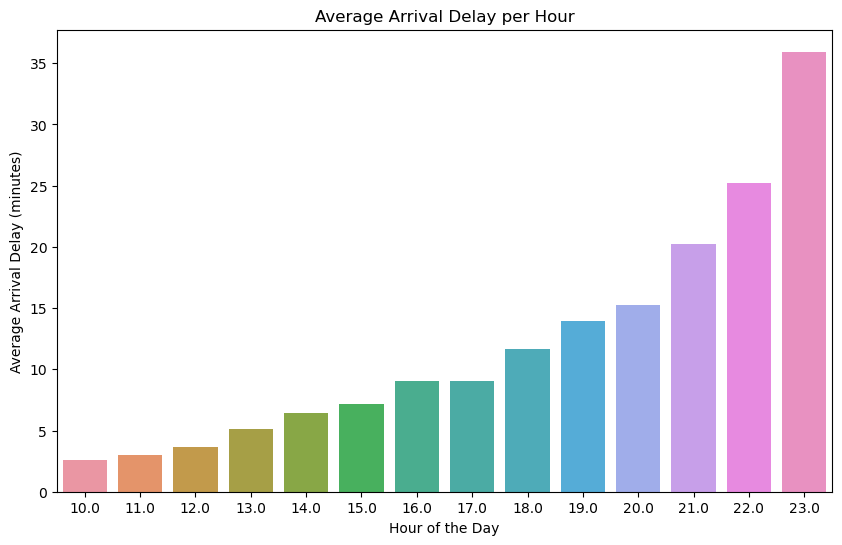

In [31]:
# Visualize average delay per hour
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_delay_per_hour', y='avg_arr_delay_per_hour', data=flight)
plt.title('Average Arrival Delay per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Arrival Delay (minutes)')
plt.show()

From the chart, it is evident that arrival delays tend to increase as the day progresses. The morning hours (10:00 - 12:00) experience the lowest average delays, typically under 5 minutes. As the day advances into the afternoon (13:00 - 17:00), the average delays gradually increase, reaching approximately 10 minutes.

A significant spike in delays is observed during the evening hours, with delays escalating sharply from 20:00 onwards. The highest average delays occur at 23:00, with an average delay exceeding 35 minutes. This trend suggests that later flights are more prone to longer delays, potentially due to cumulative delays throughout the day affecting subsequent flights. Thus, the optimal time to fly in a single day is early in the morning.

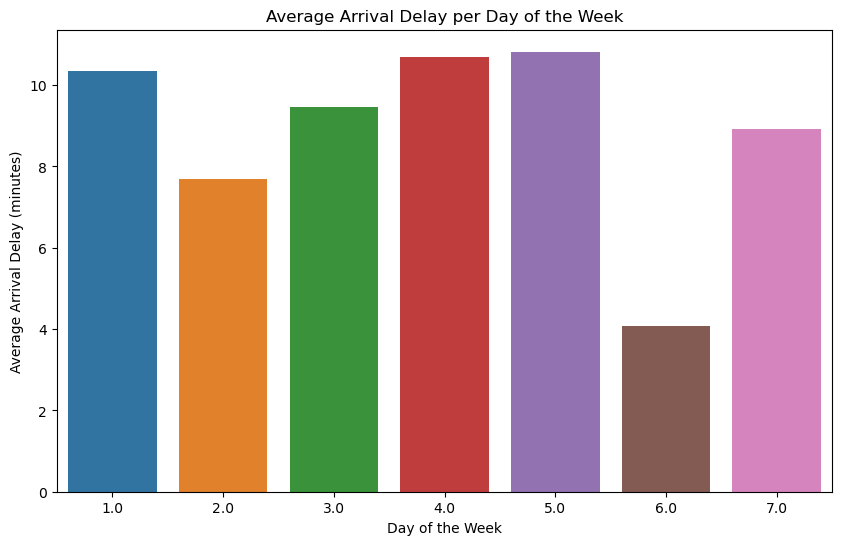

In [32]:
# Visualize average delay per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_delay_per_week', y='avg_arr_delay_per_week', data=flight)
plt.title('Average Arrival Delay per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Arrival Delay (minutes)')
plt.show()

The data shows that the highest average delays in arriving are during Monday, a little above 10 minutes. This high can be attributed to an increased level of business operations at that time of the week and possible operational inefficiencies that pile up over the weekend. The average delays are significantly cut down on the following day, Tuesday, to about 8 minutes. The reduced delays might be contributed by a stabilized operation from the previous day's peak-hour situation and maybe because of a reduced number of flights. The following day, Wednesday, the delays slightly go back up to an average of about 9 minutes. In a midweek scenario, the trend could reflect the stabilization of business and leisure travel activities, which would result in average delays.

The spike in delays is seen once again on Thursday, reflecting the conditioning by Monday, with average delays of just over 10 minutes. Friday reflects the trend of a high average delay of around 10 minutes because of the convergence of business travel ending the week and weekend travel beginning. Sunday once again experiences a high spike in delays, with average delays of around 8 minutes. This results from the high rate of travelers returning home to set off for work during the week.

According to the analysis, the best day for flights is Saturday. The aircraft is least delayed on this day. This is the most reliable travelling experience in terms of punctuality.

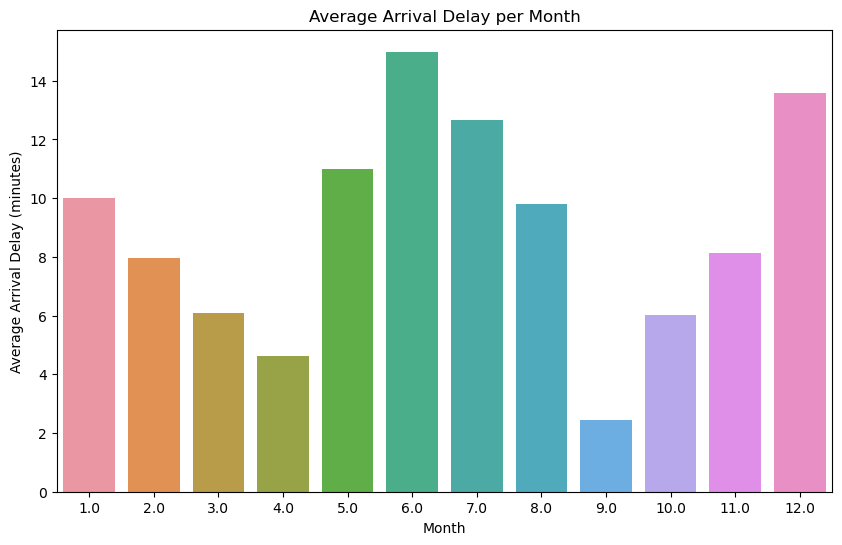

In [33]:
# Visualize average delay per month
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_delay_per_month', y='avg_arr_delay_per_month', data=flight)
plt.title('Average Arrival Delay per Month')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (minutes)')
plt.show()

The plot indicates that January experiences a relatively high average arrival delay, slightly above 10 minutes. This is likely due to the residual effects of the holiday travel season, including weather-related disruptions and increased passenger volume. February and March see a gradual improvement, with delays averaging around 8 and 6 minutes, respectively.

April and May continue this trend, with average delays further decreasing to approximately 5 minutes. However, a significant increase is observed in June, where delays peak at over 14 minutes. July and August maintain high delay averages, hovering around 13 minutes. These months are typically characterized by peak vacation travel, exacerbating operational challenges and contributing to longer delays. September, in contrast, shows the lowest average delay of the year, at around 4 minutes. This decline is likely due to the end of the summer travel rush and a return to more manageable passenger volumes.

As the year progresses, October sees a slight increase to about 6 minutes, followed by a rise in November to 8 minutes. December matches January with an average delay exceeding 10 minutes, reflecting the significant travel activity during the holiday period and the associated operational challenges.

Based on the analysis, the optimal months for flights to minimize arrival delays are April, May, and September. These months consistently show lower average delays, offering a more reliable travel experience. Specifically, September stands out with the lowest average delay of approximately 4 minutes, making it the best month for punctuality.

### Factors contributing to flight delays

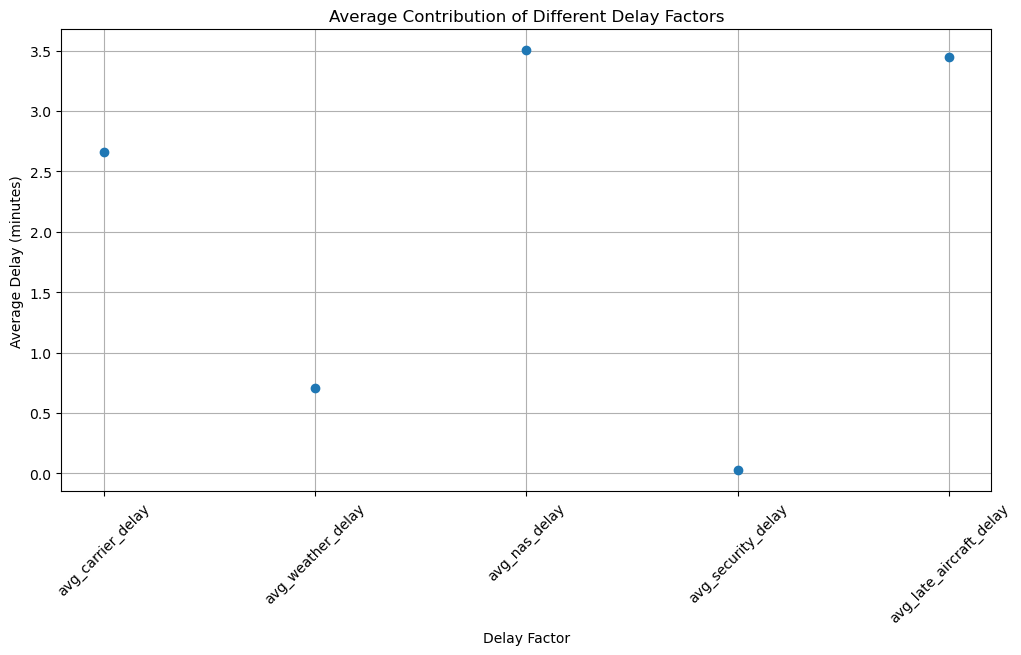

In [34]:
# List of delay columns to analyze
delay_columns = [
    'avg_carrier_delay',
    'avg_weather_delay',
    'avg_nas_delay',
    'avg_security_delay',
    'avg_late_aircraft_delay'
]

# Convert the delay columns to a DataFrame for easier plotting
delay_data = flight[delay_columns].melt(var_name='DelayFactor', value_name='AverageDelay')

# Plot the average delay for each delay factor
plt.figure(figsize=(12, 6))
plt.plot(delay_data['DelayFactor'], delay_data['AverageDelay'], marker='o')
plt.title('Average Contribution of Different Delay Factors')
plt.xlabel('Delay Factor')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Carrier delays averaging around 2.5 minutes. These delay can include maintenance problems, crew availability, baggage handling, and other operational inefficiencies. Weather delay is significantly lower compare to carrier delay with around 0.5 minutes. This caused by adverse weather conditions such as thunderstorms, snow, fog, and high winds. These delays are often unavoidable and can significantly impact flight schedules.

National Airspace System (NAS) Delays is the highest delay with 3.5 minutes. Factors contributing to NAS delays include air traffic control (ATC) restrictions, congestion in the airspace, airport operations, and other systemic issues. NAS delay are followed by late aircraft delay with 3.3 minutes. This occur when a previous flight arrives late, causing a ripple effect on subsequent flights. 

Security delay is the lowest delay compare to others with 0.1 minutes. The primary factors that contributing delay is NAS delay with 3.5 minutes followed by late aircraft delay. 

### Factors lead to flight cancellations

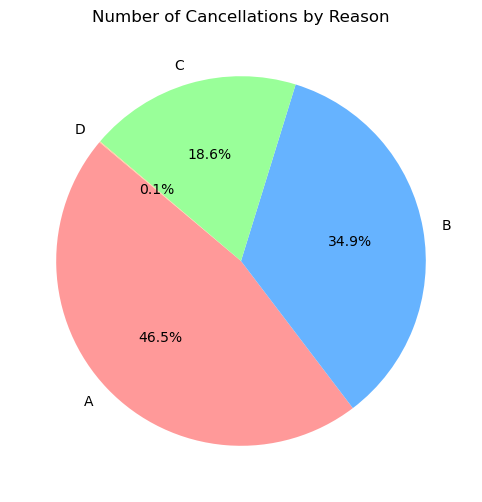

In [35]:
# Ensure there are no NaN values in the cancellation columns
flight['cancellation_reasons'].fillna('Unknown', inplace=True)
flight['cancellation_count'].fillna(0, inplace=True)

# Filter out 'Unknown' cancellation reasons
flight_filtered = flight[flight['cancellation_reasons'] != 'Unknown']

# Group by cancellation reasons and sum the counts
cancellation_summary = flight_filtered.groupby('cancellation_reasons')['cancellation_count'].sum().reset_index()

# List of colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plot the number of cancellations by reason with custom colors
plt.figure(figsize=(12, 6))
plt.pie(cancellation_summary['cancellation_count'], 
        labels=cancellation_summary['cancellation_reasons'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors)
plt.title('Number of Cancellations by Reason')
plt.show()

The data shows that the most significant number of cancellations is due to the category represented by "A," accounting for nearly 60,000 cancellations. This category includes carrier-related issues such as maintenance problems, crew unavailability, or operational inefficiencies. The second most common reason for cancellations, represented by "B," accounts for around 45,000 cancellations. This category involves weather-related issues. While weather is an uncontrollable factor, better forecasting, and flexible scheduling can help mitigate some of the impacts.

The third category, "C," includes approximately 30,000 cancellations and is likely related to National Airspace System (NAS) issues, such as air traffic control restrictions, airport congestion, and other systemic factors. Addressing these cancellations requires a coordinated effort between airlines, airports, and air traffic management authorities. The fourth category, represented by "D," accounts for a minimal number of cancellations, suggesting that security-related issues have a relatively minor impact on overall flight cancellations. In summary, the analysis highlights that carrier-related and weather-related issues are the leading causes of flight cancellations.

### Flight experiences with the most significant delays and cancellations

In [14]:
# Find the flight with the highest number of delays
most_frequent_delays = flight.groupby('flightnum')['issues_total_delays'].sum().reset_index()
most_frequent_delays = most_frequent_delays.sort_values(by='issues_total_delays', ascending=False).head(10)

print("Flights with the most frequent delays:")
print(most_frequent_delays)

# Find the flight with the highest number of cancellations
most_frequent_cancellations = flight.groupby('flightnum')['issues_num_cancellations'].sum().reset_index()
most_frequent_cancellations = most_frequent_cancellations.sort_values(by='issues_num_cancellations', ascending=False).head(10)

print("Flights with the most frequent cancellations:")
print(most_frequent_cancellations)

Flights with the most frequent delays:
      flightnum  issues_total_delays
645       647.0              69478.0
436       438.0              68992.0
577       579.0              65811.0
1134     1138.0              64801.0
266       268.0              64359.0
437       439.0              63836.0
777       780.0              63624.0
195       197.0              63013.0
574       576.0              62612.0
345       347.0              62331.0
Flights with the most frequent cancellations:
      flightnum  issues_num_cancellations
59         61.0                     137.0
149       151.0                     136.0
538       540.0                     112.0
62         64.0                     105.0
31         33.0                     103.0
29         31.0                      99.0
654       656.0                      97.0
1171     1175.0                      95.0
136       138.0                      95.0
27         29.0                      92.0


Top 5 Flights with Most Cancellations:
     flightnum  issues_total_delays  issues_num_cancellations
59        61.0              52062.0                     137.0
149      151.0              31887.0                     136.0
538      540.0              49195.0                     112.0
62        64.0              52915.0                     105.0
31        33.0              38170.0                     103.0
Top 5 Flights with Most Delays:
      flightnum  issues_total_delays  issues_num_cancellations
645       647.0              69478.0                      58.0
436       438.0              68992.0                      45.0
577       579.0              65811.0                      57.0
1134     1138.0              64801.0                      89.0
266       268.0              64359.0                      36.0


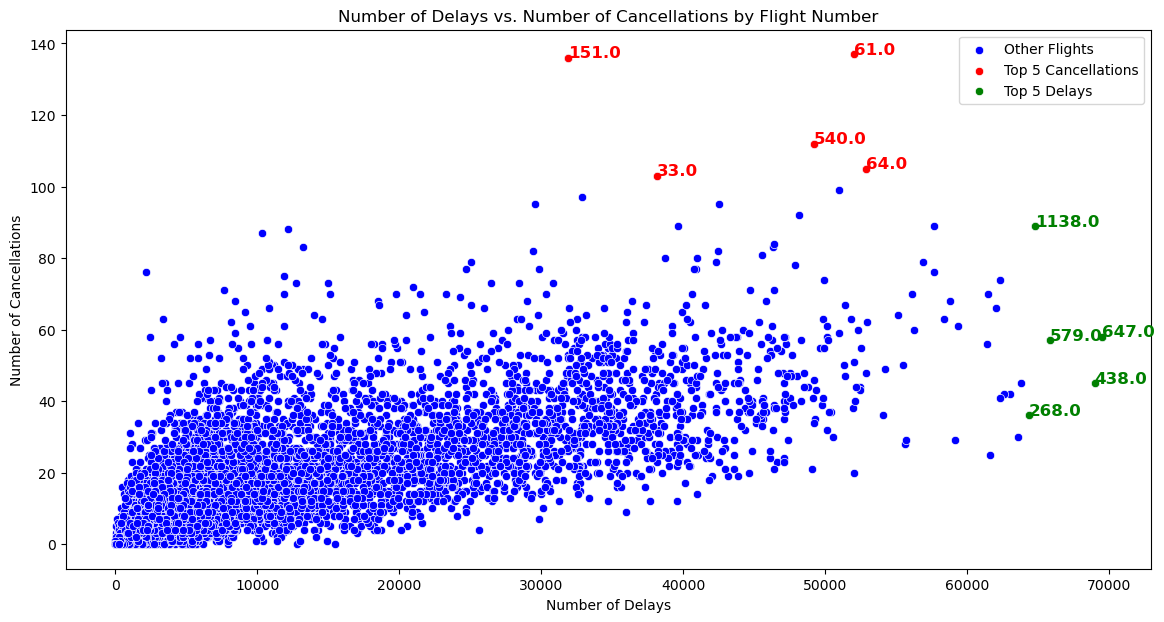

In [15]:
# Aggregate data by flight number
agg_data = flight.groupby('flightnum').agg({
    'issues_total_delays': 'sum',
    'issues_num_cancellations': 'sum'
}).reset_index()

# Identify top 5 flights with most cancellations
top_5_cancellations = agg_data.nlargest(5, 'issues_num_cancellations')
print("Top 5 Flights with Most Cancellations:")
print(top_5_cancellations)

# Identify top 5 flights with most delays
top_5_delays = agg_data.nlargest(5, 'issues_total_delays')
print("Top 5 Flights with Most Delays:")
print(top_5_delays)

# Scatter plot for number of delays vs. number of cancellations
plt.figure(figsize=(14, 7))

# Plot all flights
sns.scatterplot(x='issues_total_delays', y='issues_num_cancellations', data=agg_data, label='Other Flights', color='blue')

# Highlight flights with most cancellations
sns.scatterplot(x='issues_total_delays', y='issues_num_cancellations', data=top_5_cancellations, label='Top 5 Cancellations', color='red')

# Highlight flights with most delays
sns.scatterplot(x='issues_total_delays', y='issues_num_cancellations', data=top_5_delays, label='Top 5 Delays', color='green')

# Annotate top 5 flights with most cancellations
for i in range(top_5_cancellations.shape[0]):
    plt.text(top_5_cancellations['issues_total_delays'].iloc[i],
             top_5_cancellations['issues_num_cancellations'].iloc[i],
             top_5_cancellations['flightnum'].iloc[i],
             fontsize=12, color='red', weight='bold')

# Annotate top 5 flights with most delays
for i in range(top_5_delays.shape[0]):
    plt.text(top_5_delays['issues_total_delays'].iloc[i],
             top_5_delays['issues_num_cancellations'].iloc[i],
             top_5_delays['flightnum'].iloc[i],
             fontsize=12, color='green', weight='bold')

plt.title('Number of Delays vs. Number of Cancellations by Flight Number')
plt.xlabel('Number of Delays')
plt.ylabel('Number of Cancellations')
plt.legend()
plt.show()


There is a positive correlation between the number of delays and the number of cancellations. Flights with higher numbers of delays tend to also have higher numbers of cancellations. This trend suggests that delays are a significant precursor to cancellations, potentially due to cascading operational issues.

The plot highlights specific outliers, with flight numbers 151, 61, 33, 540, and 64 identified in red as the top 5 flights with the most cancellations. These flights have exceptionally high cancellation numbers compared to the general trend, indicating persistent or severe issues that warrant further investigation.

The top 5 flights with the most delays are marked in green, with flight numbers 1138, 579, 647, 438, and 268. These flights exhibit a significantly higher number of delays than others, suggesting they face consistent operational challenges. Interestingly, these flights do not necessarily correspond to the flights with the most cancellations, indicating that while they are heavily delayed, they may still manage to avoid cancellations more effectively

The majority of flights cluster towards the lower end of the delays and cancellations spectrum. Most flights experience fewer than 20,000 delays and fewer than 40 cancellations, indicating that while delays are common, cancellations are less frequent for most flights.